In [620]:
import os 

In [621]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats

from scipy.stats import norm
#from pyglmnet import GLM # Marco: need to understand how to install this 
from sklearn.preprocessing import StandardScaler

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')


from pandas import ExcelWriter  #Marco: this is useful to write in excel

In [622]:
os. getcwd()

'C:\\Users\\C17000032\\Desktop\\Reddy docs\\Python\\House Prices - ART'

In [623]:
os.chdir('C:\\Users\\C17000032\\Desktop\\Reddy docs\\Python\\House Prices - ART')

In [624]:
os. getcwd()

'C:\\Users\\C17000032\\Desktop\\Reddy docs\\Python\\House Prices - ART'

In [625]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [626]:
data = pd.read_csv('train1.csv')
test = pd.read_csv('test.csv')

In [627]:
def isnullcheck(data_slice):
    for row in data_slice.isnull():
        if row:
            print (row)

In [628]:
data.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [629]:
data.kurt()

Id                -1.200000
MSSubClass         1.580188
LotFrontage       17.452867
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0

In [630]:
data.shape

(1460, 81)

Johnson SU
Normal
Normal Log


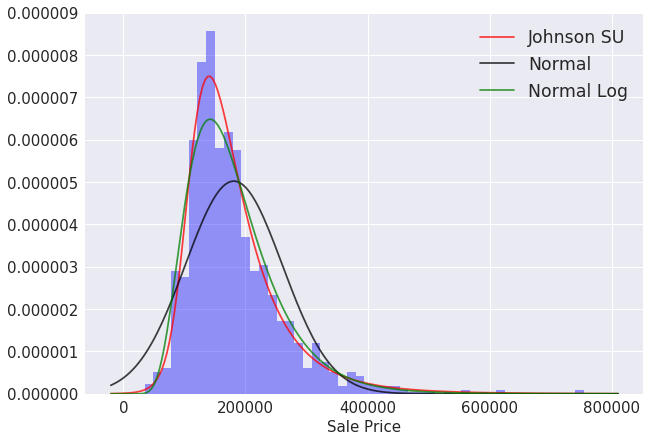

In [631]:

import seaborn as sns
from scipy import stats
dist_fig, ax = plt.subplots(figsize = (10,7))
dist_fig = {'Johnson SU':stats.johnsonsu, 'Normal' : stats.norm, 'Normal Log' : stats.lognorm}
color = {'Johnson SU':'r', 'Normal':'k', 'Normal Log' : 'g'}

for key, dist in dist_fig.items():
    print (key)
    sns.distplot(data['SalePrice'], kde=False, ax=ax, fit=dist, color='b', bins=50, hist_kws = {'alpha': 0.15}, fit_kws = {'color': color[key], 'label': key, 'alpha' : 0.75})
    ax.legend(loc='upper right', fontsize='xx-large')
    ax.tick_params(labelsize=15)
    ax.set_xlabel('Sale Price', fontsize=15)

In [632]:
frac = data.shape[0]*0.9 # number of non NA values we are satisfied with in each column . Lets say we need at least 90% non-NA values (columns with more than these will be dropped)
percent_missing = (100*(data.isnull().sum())/data.shape[0]) 
percent_missing.sort_values(ascending = False).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Utilities        0.000000
dtype: float64

In [633]:
data_c= data.select_dtypes(exclude = [np.number])
data_n = data.drop(data_c, axis = 1)


In [634]:
data_c.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [635]:
data.shape

(1460, 81)

In [636]:
data_c.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [637]:
data_cd = pd.get_dummies(data_c)

In [638]:
data_cd.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [639]:
data_n.shape

(1460, 38)

In [640]:
data_n = data_n.drop('Id', axis = 1)

In [641]:
data_n.shape

(1460, 37)

In [642]:
data_c.shape

(1460, 43)

In [643]:
data_nm = pd.melt(data, value_vars = data_n, var_name = 'Feature')
data_nm.head()

,Feature,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0


In [644]:
data_cm =

SyntaxError: invalid syntax (<ipython-input-644-edda6f7ccbd9>, line 1)

In [645]:
data_nm

,Feature,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0
5,MSSubClass,50.0
6,MSSubClass,20.0
7,MSSubClass,60.0
8,MSSubClass,50.0
9,MSSubClass,190.0


In [646]:
std = data_n.std()
std

MSSubClass          42.300571
LotFrontage         24.284752
LotArea           9981.264932
OverallQual          1.382997
OverallCond          1.112799
YearBuilt           30.202904
YearRemodAdd        20.645407
MasVnrArea         181.066207
BsmtFinSF1         456.098091
BsmtFinSF2         161.319273
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
1stFlrSF           386.587738
2ndFlrSF           436.528436
LowQualFinSF        48.623081
GrLivArea          525.480383
BsmtFullBath         0.518911
BsmtHalfBath         0.238753
FullBath             0.550916
HalfBath             0.502885
BedroomAbvGr         0.815778
KitchenAbvGr         0.220338
TotRmsAbvGrd         1.625393
Fireplaces           0.644666
GarageYrBlt         24.689725
GarageCars           0.747315
GarageArea         213.804841
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
3SsnPorch           29.317331
ScreenPorch         55.757415
PoolArea            40.177307
MiscVal   

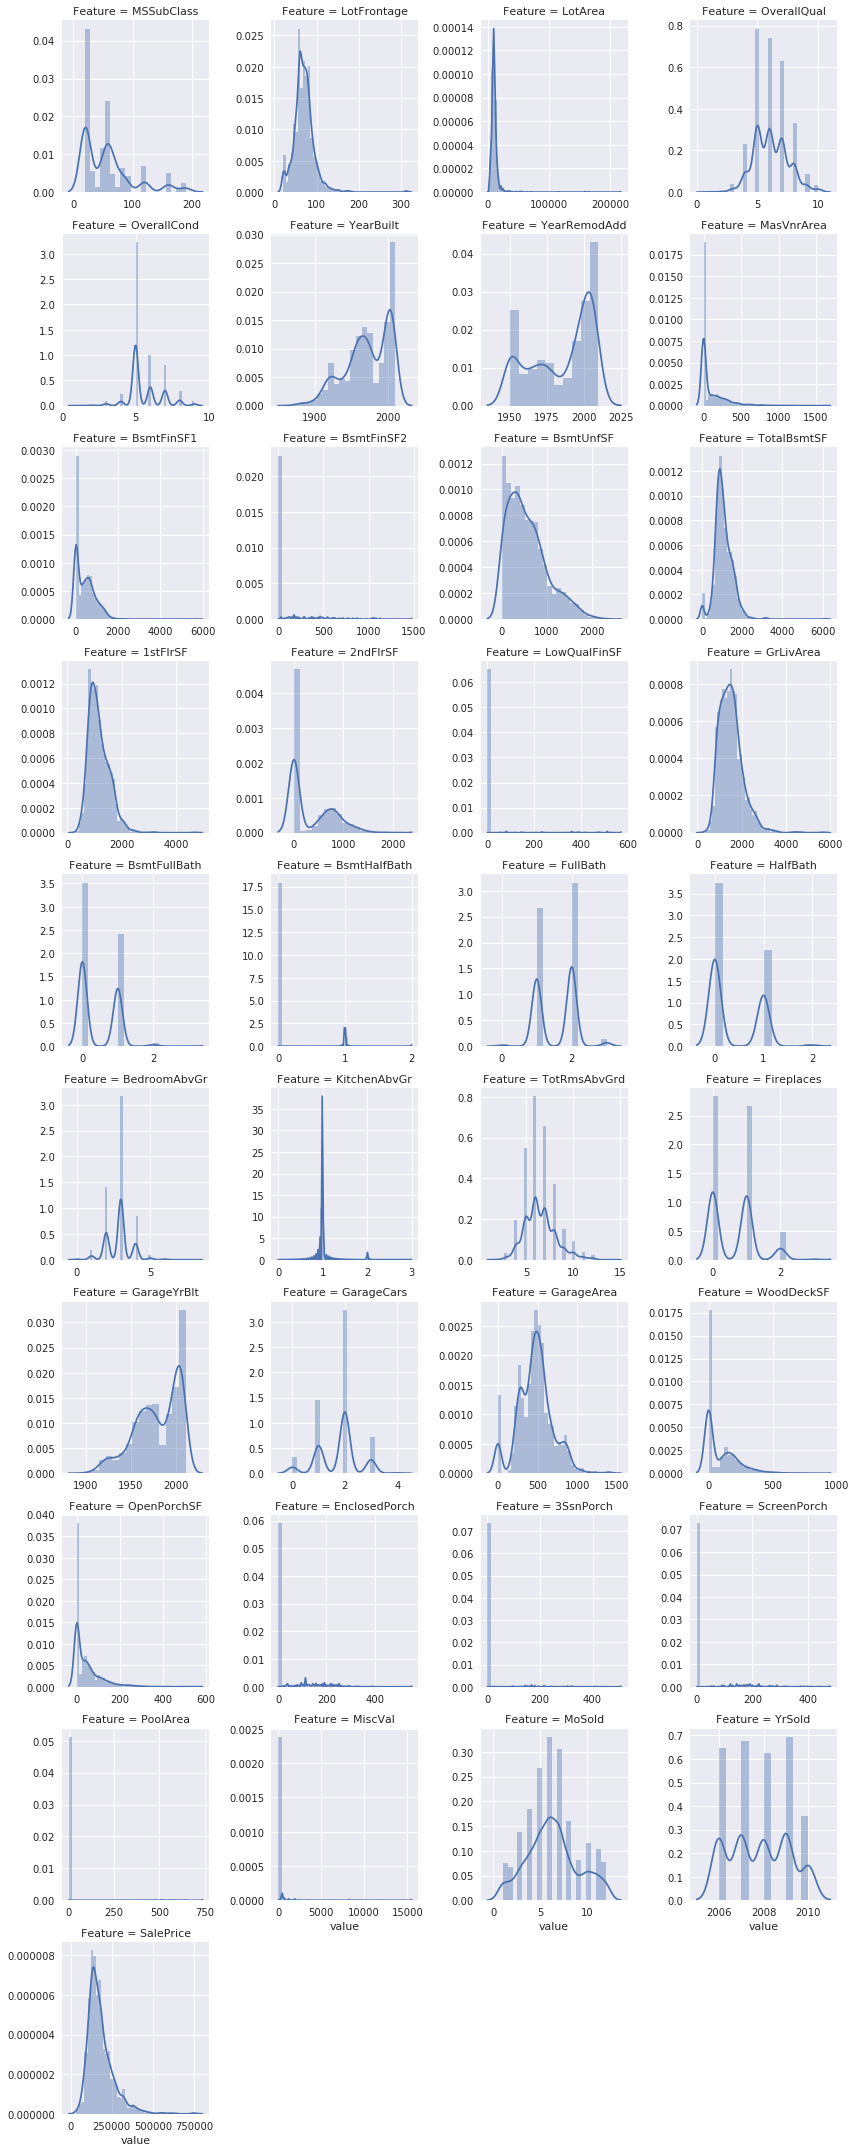

In [647]:
g = sns.FacetGrid(data_nm, col = "Feature", col_wrap = 4, sharex = False, sharey = False)
g = g.map(sns.distplot, "value")

In [648]:
data_cm.dtypes

SalePrice     int64
variable     object
value        object
dtype: object

In [649]:
corr = data_n.corr()
print (corr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


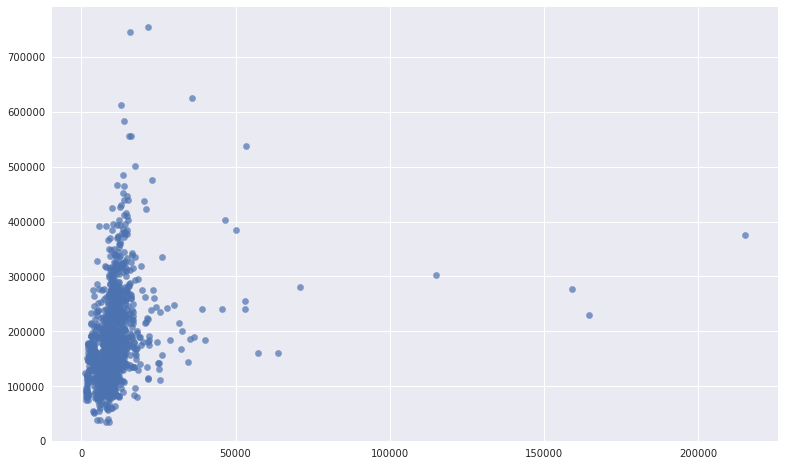

In [650]:
plt.figure(figsize = (13,8))
ax = plt.subplot()

ax.scatter(data.LotArea, data.SalePrice, alpha = .7, s = 40)



In [651]:
data.LotArea.shape

(1460,)

In [652]:
data_n = data_n.drop(data_n[data_n['LotArea']>50001].index)

In [653]:
data_n.LotArea.shape

(1449,)

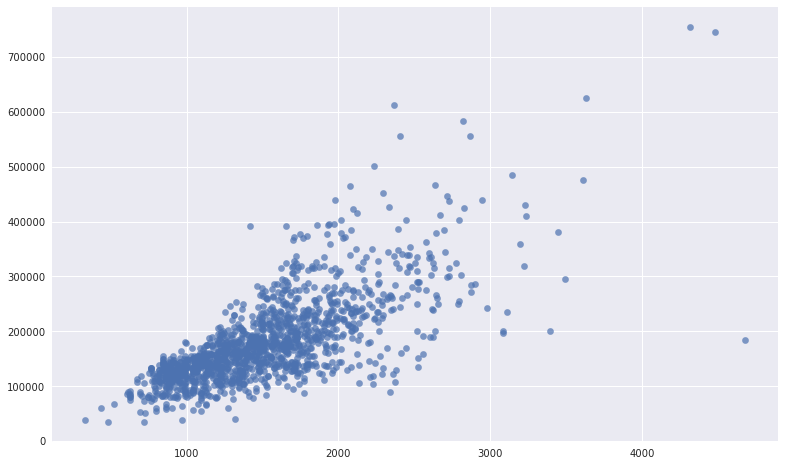

In [654]:
plt.figure(figsize = (13,8))
ax = plt.subplot()

ax.scatter(data_n.GrLivArea, data_n.SalePrice, alpha = .7, s = 40)

In [655]:
data_n.GrLivArea.shape

(1449,)

In [656]:
data_n = data_n.drop(data_n[data_n['GrLivArea']>3000].index)

In [657]:
data_n.GrLivArea.shape

(1433,)

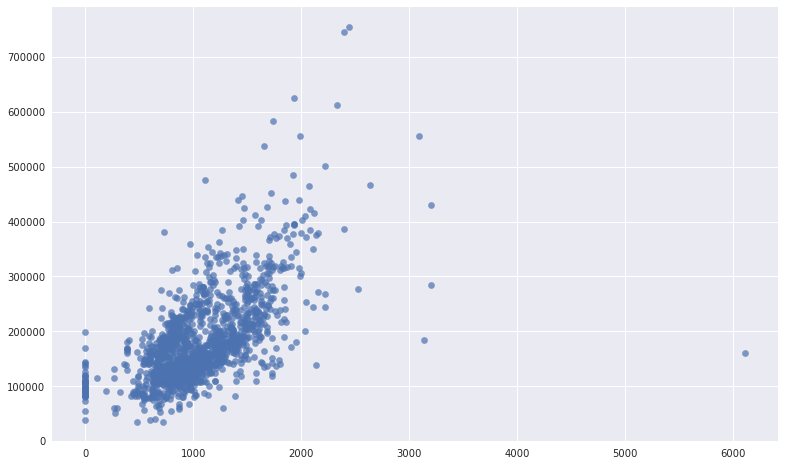

In [658]:
plt.figure(figsize = (13,8))
ax = plt.subplot()

ax.scatter(data.TotalBsmtSF, data.SalePrice, alpha = .7, s = 40)

In [659]:
data_n.TotalBsmtSF.shape

(1433,)

In [660]:
data_n = data_n.drop(data_n[data_n['TotalBsmtSF']>3000].index)

In [661]:
data_n.TotalBsmtSF.shape

(1431,)

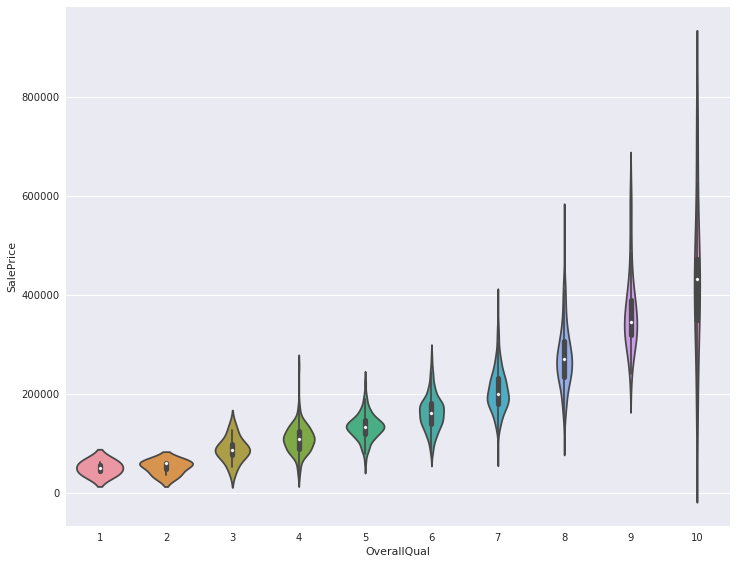

In [662]:
sns.set(font='DejaVu Sans')
sns.set_context(font_scale=15)
sns.factorplot(x='OverallQual', y="SalePrice", data=data, kind='violin',size=8, aspect=1.3)

In [663]:

isnullcheck(data['YearBuilt'])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

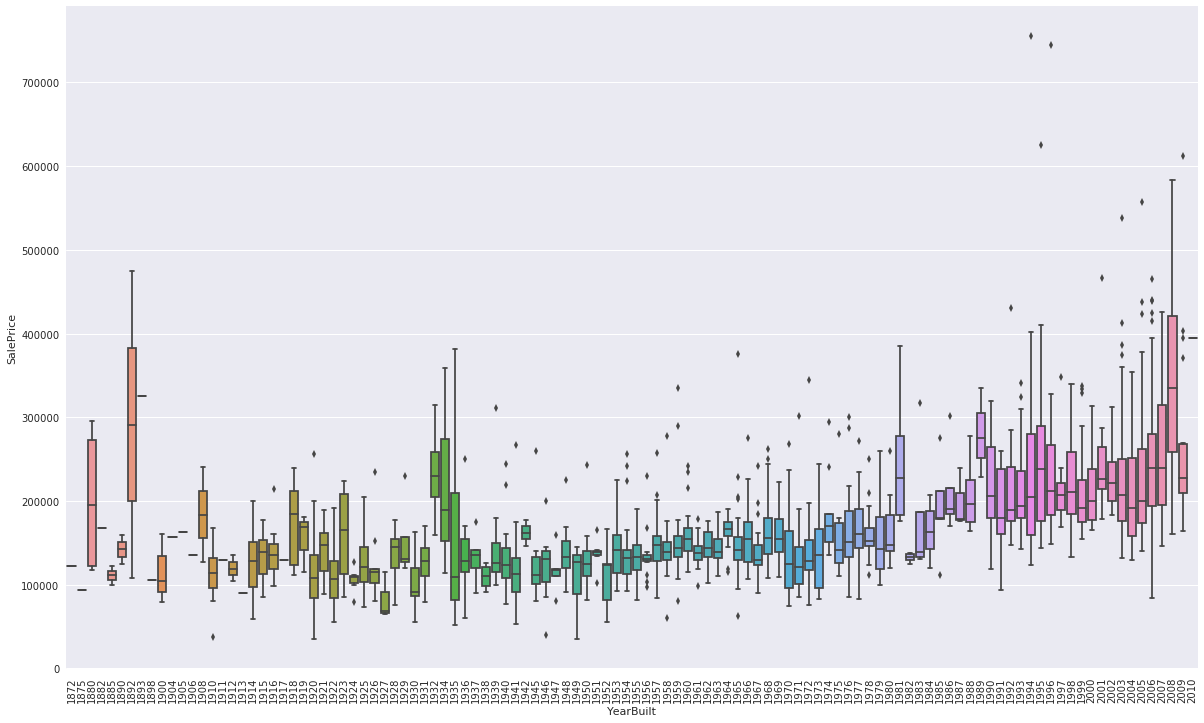

In [664]:
sns.factorplot(x='YearBuilt', y="SalePrice", data=data, kind='box',size=10, aspect=1.7)
plt.xticks(rotation=90)

In [665]:
data_n.std()

MSSubClass          42.320782
LotFrontage         22.661105
LotArea           4416.014592
OverallQual          1.355527
OverallCond          1.106821
YearBuilt           30.060594
YearRemodAdd        20.726244
MasVnrArea         172.119610
BsmtFinSF1         424.380961
BsmtFinSF2         159.985903
BsmtUnfSF          439.117707
TotalBsmtSF        397.718420
1stFlrSF           359.447989
2ndFlrSF           421.599373
LowQualFinSF        40.447237
GrLivArea          466.487976
BsmtFullBath         0.512731
BsmtHalfBath         0.237138
FullBath             0.538045
HalfBath             0.502744
BedroomAbvGr         0.797055
KitchenAbvGr         0.221032
TotRmsAbvGrd         1.554043
Fireplaces           0.628841
GarageYrBlt         24.719606
GarageCars           0.741571
GarageArea         210.336841
WoodDeckSF         121.771326
OpenPorchSF         65.280600
EnclosedPorch       59.622762
3SsnPorch           29.609051
ScreenPorch         54.911885
PoolArea            33.043556
MiscVal   

In [666]:
data.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

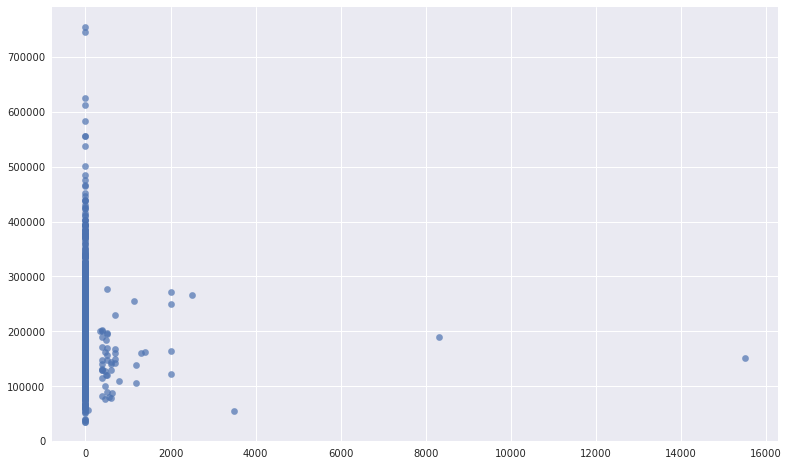

In [667]:
plt.figure(figsize = (13,8))
ax = plt.subplot()

ax.scatter(data.MiscVal, data.SalePrice, alpha = .7, s = 40)

In [668]:
data_n.MiscVal.shape

(1431,)

In [669]:
data_n=data_n.drop(data_n[data_n['MiscVal']> 8000].index)


In [670]:
data_n.MiscVal.shape

(1429,)

In [671]:
data_n.std()

MSSubClass          42.330089
LotFrontage         22.661105
LotArea           4411.770642
OverallQual          1.356181
OverallCond          1.105629
YearBuilt           30.079766
YearRemodAdd        20.736767
MasVnrArea         172.200150
BsmtFinSF1         424.670377
BsmtFinSF2         160.033388
BsmtUnfSF          439.410305
TotalBsmtSF        397.900084
1stFlrSF           359.620218
2ndFlrSF           421.092488
LowQualFinSF        40.475229
GrLivArea          465.639432
BsmtFullBath         0.512852
BsmtHalfBath         0.237294
FullBath             0.538093
HalfBath             0.501166
BedroomAbvGr         0.796716
KitchenAbvGr         0.219740
TotRmsAbvGrd         1.547721
Fireplaces           0.628994
GarageYrBlt         24.732801
GarageCars           0.741792
GarageArea         210.408586
WoodDeckSF         121.820881
OpenPorchSF         65.312371
EnclosedPorch       59.572495
3SsnPorch           29.629492
ScreenPorch         54.947524
PoolArea            33.066624
MiscVal   

In [672]:
tdata = (data_n , data_c )

In [675]:
pd.concat(tdata, axis = 1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,50.0,85.0,14115.0,5.0,5.0,1993.0,1995.0,0.0,732.0,0.0,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,20.0,75.0,10084.0,8.0,5.0,2004.0,2005.0,186.0,1369.0,0.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,60.0,NaN,10382.0,7.0,6.0,1973.0,1973.0,240.0,859.0,32.0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,50.0,51.0,6120.0,7.0,5.0,1931.0,1950.0,0.0,0.0,0.0,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,190.0,50.0,7420.0,5.0,6.0,1939.0,1950.0,0.0,851.0,0.0,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [677]:
tdata.head()


AttributeError: 'tuple' object has no attribute 'head'

In [519]:
data_c_null = data_c.isnull().any()

In [518]:
for catg in data_c:
    data[catg] = data[catg].astype('category')
    print('Categorical variable: %s' %catg, ', Categories: {}'. format(data[catg].cat.categories))

Categorical variable: MSZoning , Categories: Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object')
Categorical variable: Street , Categories: Index(['Grvl', 'Pave'], dtype='object')
Categorical variable: Alley , Categories: Index(['Grvl', 'Pave'], dtype='object')
Categorical variable: LotShape , Categories: Index(['IR1', 'IR2', 'IR3', 'Reg'], dtype='object')
Categorical variable: LandContour , Categories: Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object')
Categorical variable: Utilities , Categories: Index(['AllPub', 'NoSeWa'], dtype='object')
Categorical variable: LotConfig , Categories: Index(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype='object')
Categorical variable: LandSlope , Categories: Index(['Gtl', 'Mod', 'Sev'], dtype='object')
Categorical variable: Neighborhood , Categories: Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge

In [520]:
List_catg_null = data_c_null.index.tolist()
List_catg_null


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [521]:
for catg in List_catg_null:
    data[catg]=data[catg].cat.add_categories(['Missing'])
    data[catg] = data[catg].fillna('Missing')

In [522]:
data_c.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [523]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [524]:
data_cm = pd.melt(data,id_vars=['SalePrice'],value_vars = data_c)

In [525]:
data_cm.head()


,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL


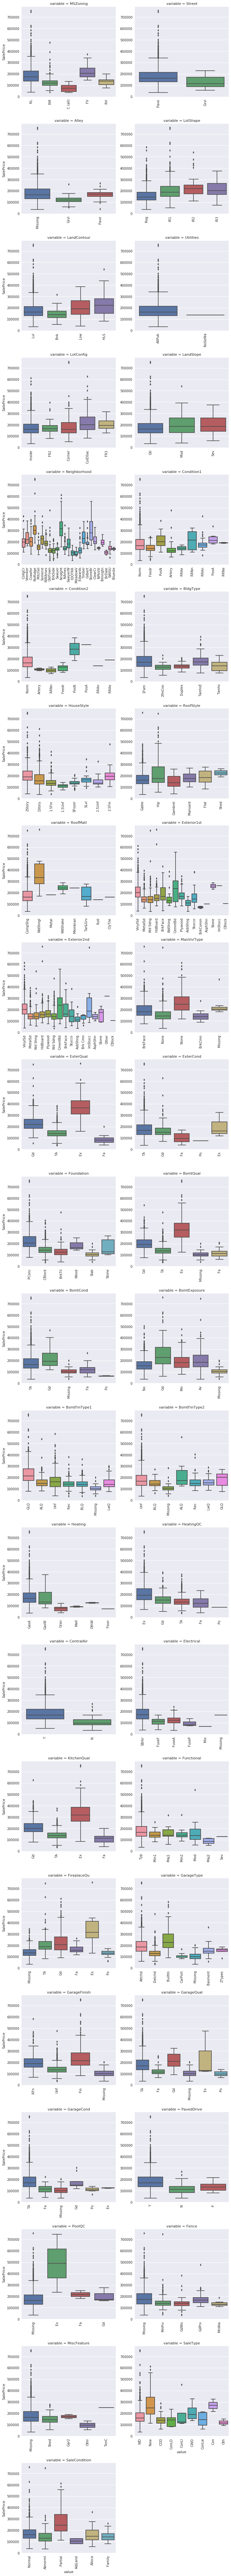

In [526]:
def boxplot(x, y, **kwargs):
    ax = sns.boxplot(x=x, y = y)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    
g = sns.FacetGrid(data_cm, col="variable", col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")


In [552]:
def encode_meanSP(dframe, feature):
    ordering = pd.DataFrame()
    # Getting the calue of categories in the feature
    ordering['val'] = dframe[feature].unique()
    # Making the index equal to the category values
    ordering.index = ordering.val
    # Getting the mean value of SalePrice in each category
    ordering['spmeancategory'] = dframe[[feature, 'SalePrice']].groupby(feature).mean()
    ordering = ordering.sort_values('spmeancategory')
    # The order is ascendent, so we add an ordering value 1,2, etc accoridngly with the ascendent value
    ordering['ordering'] = range(1, ordering.shape[0] + 1 )
    # transform a dictionary with the category as key and value the ordering number (ascending order of SP mean)
    ordering = ordering['ordering'].to_dict()
    
    # Adding new columns of the categorical features that contains the ordered value according with
    # the SP mean obtained pear each category within a feature
    for category, orderval in ordering.items():
        dframe.loc[dframe[feature] == category, feature + "_E"] = orderval

In [555]:
# Getting the list of the new columns related to the categorical fetures and adding 
# to the training set the new values of the ordering of the SP mean for each cacegory within a feature
qualitative_ecoded = []
data_copy = data.copy()

for feature in data_c:
    encode_meanSP(data_copy, feature)
    qualitative_ecoded.append(feature + "_E")
print (qualitative_ecoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [572]:
data_cm.shape

(62780, 3)

In [573]:
data_nm.shape

(54020, 2)

In [564]:
pd.set_option('display.max_rows', 1000)
Fdata.isnull().sum()


1stFlrSF                 1460
2ndFlrSF                 1460
3SsnPorch                1460
Alley_Grvl               1429
Alley_Pave               1429
BedroomAbvGr             1460
BldgType_1Fam            1429
BldgType_2fmCon          1429
BldgType_Duplex          1429
BldgType_Twnhs           1429
BldgType_TwnhsE          1429
BsmtCond_Fa              1429
BsmtCond_Gd              1429
BsmtCond_Po              1429
BsmtCond_TA              1429
BsmtExposure_Av          1429
BsmtExposure_Gd          1429
BsmtExposure_Mn          1429
BsmtExposure_No          1429
BsmtFinSF1               1460
BsmtFinSF2               1460
BsmtFinType1_ALQ         1429
BsmtFinType1_BLQ         1429
BsmtFinType1_GLQ         1429
BsmtFinType1_LwQ         1429
BsmtFinType1_Rec         1429
BsmtFinType1_Unf         1429
BsmtFinType2_ALQ         1429
BsmtFinType2_BLQ         1429
BsmtFinType2_GLQ         1429
BsmtFinType2_LwQ         1429
BsmtFinType2_Rec         1429
BsmtFinType2_Unf         1429
BsmtFullBa

In [566]:
frac1 = Fdata.shape[0]*0.9 # number of non NA values we are satisfied with in each column . Lets say we need at least 90% non-NA values (columns with more than these will be dropped)
percent_missing = (100*(Fdata.isnull().sum())/Fdata.shape[0]) 
percent_missing.sort_values(ascending = False)

LotFrontage              59.155417
GarageYrBlt              53.271028
MasVnrArea               50.813430
YrSold                   50.536518
PoolArea                 50.536518
OverallCond              50.536518
OpenPorchSF              50.536518
MoSold                   50.536518
MiscVal                  50.536518
MSSubClass               50.536518
LowQualFinSF             50.536518
LotArea                  50.536518
KitchenAbvGr             50.536518
HalfBath                 50.536518
GrLivArea                50.536518
YearRemodAdd             50.536518
GarageCars               50.536518
GarageArea               50.536518
FullBath                 50.536518
Fireplaces               50.536518
EnclosedPorch            50.536518
BsmtUnfSF                50.536518
BsmtHalfBath             50.536518
BsmtFullBath             50.536518
BsmtFinSF2               50.536518
BsmtFinSF1               50.536518
BedroomAbvGr             50.536518
3SsnPorch                50.536518
2ndFlrSF            

In [578]:
Fdata = Fdata.fillna(Fdata.mean())


In [579]:
frac2 = Fdata.shape[0]*0.9 # number of non NA values we are satisfied with in each column . Lets say we need at least 90% non-NA values (columns with more than these will be dropped)
percent_missing = (100*(Fdata.isnull().sum())/Fdata.shape[0]) 
percent_missing.sort_values(ascending = False)

YrSold                   0.0
GarageQual_TA            0.0
Exterior2nd_Brk Cmn      0.0
Exterior2nd_BrkFace      0.0
Exterior2nd_CBlock       0.0
Exterior2nd_CmentBd      0.0
Exterior2nd_HdBoard      0.0
Exterior2nd_ImStucc      0.0
Exterior2nd_MetalSd      0.0
Exterior2nd_Other        0.0
Exterior2nd_Plywood      0.0
Exterior2nd_Stone        0.0
Exterior2nd_Stucco       0.0
Exterior2nd_VinylSd      0.0
Exterior2nd_Wd Sdng      0.0
Exterior2nd_Wd Shng      0.0
Fence_GdPrv              0.0
Exterior2nd_AsphShn      0.0
Exterior2nd_AsbShng      0.0
Exterior1st_WdShing      0.0
Exterior1st_CemntBd      0.0
ExterQual_TA             0.0
Exterior1st_AsbShng      0.0
Exterior1st_AsphShn      0.0
Exterior1st_BrkComm      0.0
Exterior1st_BrkFace      0.0
Exterior1st_CBlock       0.0
Exterior1st_HdBoard      0.0
Exterior1st_Wd Sdng      0.0
Exterior1st_ImStucc      0.0
Exterior1st_MetalSd      0.0
Exterior1st_Plywood      0.0
Exterior1st_Stone        0.0
Exterior1st_Stucco       0.0
Exterior1st_Vi

In [580]:
skewed_feats = data_n.apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

In [581]:
skewed_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [583]:
Fdata[skewed_feats] = np.log1p(Fdata[skewed_feats])

In [603]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
def get_combine_data():
    train = pd.read_csv("train.csv")
    test = pd.read_csv("test.csv")
    targets = np.log(data.SalePrice)
    train.drop('SalePrice', 1 , inplace = True)
    combined = train.append(test)
    combined.reset_index(inplace= True)
    combined.drop('index', inplace=True, axis=1)
    
    return combined

In [604]:
combined = get_combine_data()

In [605]:
combined.shape

(2919, 80)

In [609]:
combined_num = combined.asselect.dtypes([ = np.number])

SyntaxError: invalid syntax (<ipython-input-609-1ddc500176c8>, line 1)

In [606]:
combined_num.std()

NameError: name 'combined_num' is not defined

In [799]:
combined_c.std()

Alley_Grvl               0.153971
Alley_Pave               0.112596
BldgType_1Fam            0.493334
BldgType_2fmCon          0.103172
BldgType_Duplex          0.139261
BldgType_Twnhs           0.134380
BldgType_TwnhsE          0.194125
BsmtCond_Fa              0.141632
BsmtCond_Gd              0.139261
BsmtCond_Po              0.032252
BsmtCond_TA              0.497513
BsmtExposure_Av          0.252398
BsmtExposure_Gd          0.216472
BsmtExposure_Mn          0.203730
BsmtExposure_No          0.470287
BsmtFinType1_ALQ         0.259390
BsmtFinType1_BLQ         0.200589
BsmtFinType1_GLQ         0.356691
BsmtFinType1_LwQ         0.164309
BsmtFinType1_Rec         0.225626
BsmtFinType1_Unf         0.353247
BsmtFinType2_ALQ         0.106411
BsmtFinType2_BLQ         0.109549
BsmtFinType2_GLQ         0.083029
BsmtFinType2_LwQ         0.118443
BsmtFinType2_Rec         0.131867
BsmtFinType2_Unf         0.495050
BsmtQual_Ex              0.212820
BsmtQual_Fa              0.134380
BsmtQual_Gd   

In [804]:
combined_c.shape

(2882, 234)

In [805]:
Frames = [combined_c ,combined_num]

In [806]:
Fdata = pd.concat(Frames )

In [807]:
Fdata.shape

(5764, 271)

In [808]:
Fdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5764 entries, 0 to 2881
Columns: 271 entries, 1stFlrSF to YrSold
dtypes: float64(271)
memory usage: 12.0 MB


In [597]:
all_data = pd.concat((Fdata.loc[:,'Id':'SaleCondition'],
                      test.loc[:,'Id':'SaleCondition']))

In [594]:
nullss = pd.DataFrame(Fdata.isnull().sum().sort_values(ascending=False))
nullss.coulms = ['Null Count']
nullss.index.name = 'Feature'
nullss

,0
Feature,
YrSold,0
GarageQual_TA,0
Exterior2nd_Brk Cmn,0
Exterior2nd_BrkFace,0
Exterior2nd_CBlock,0
Exterior2nd_CmentBd,0
Exterior2nd_HdBoard,0
Exterior2nd_ImStucc,0
Exterior2nd_MetalSd,0


In [595]:
Fdata = Fdata.drop(nullss)

In [596]:
Fdata.shape

(2887, 289)

In [525]:
pd.set_option("display.max_rows",1000)
Fdata.skew()

1stFlrSF                  1.256388
2ndFlrSF                  0.828041
3SsnPorch                11.306002
Alley_Grvl                6.182382
Alley_Pave                8.657709
BedroomAbvGr              0.267464
BldgType_1Fam             0.331602
BldgType_2fmCon           9.488947
BldgType_Duplex           6.900262
BldgType_Twnhs            7.171526
BldgType_TwnhsE           4.749725
BsmtCond_Fa               6.774895
BsmtCond_Gd               6.900262
BsmtCond_Po              30.956941
BsmtCond_TA               0.203157
BsmtExposure_Av           3.421981
BsmtExposure_Gd           4.166371
BsmtExposure_Mn           4.484897
BsmtExposure_No           0.723003
BsmtFinSF1                0.983286
BsmtFinSF2                4.192888
BsmtFinType1_ALQ          3.297610
BsmtFinType1_BLQ          4.568971
BsmtFinType1_GLQ          1.965807
BsmtFinType1_LwQ          5.751130
BsmtFinType1_Rec          3.957305
BsmtFinType1_Unf          2.004633
BsmtFinType2_ALQ          9.187083
BsmtFinType2_BLQ    

(array([   9.,   18.,   76.,  129.,  232.,  227.,  180.,  152.,  102.,
          90.,   55.,   52.,   27.,   30.,   22.,    9.,   13.,   12.,
           5.,    6.,    3.,    2.,    1.,    0.,    1.,    2.,    1.,
           0.,    2.,    0.,    0.,    0.,    0.,    0.,    2.]),
 array([  34900.        ,   55474.28571429,   76048.57142857,
          96622.85714286,  117197.14285714,  137771.42857143,
         158345.71428571,  178920.        ,  199494.28571429,
         220068.57142857,  240642.85714286,  261217.14285714,
         281791.42857143,  302365.71428571,  322940.        ,
         343514.28571429,  364088.57142857,  384662.85714286,
         405237.14285714,  425811.42857143,  446385.71428571,
         466960.        ,  487534.28571429,  508108.57142857,
         528682.85714286,  549257.14285714,  569831.42857143,
         590405.71428571,  610980.        ,  631554.28571429,
         652128.57142857,  672702.85714286,  693277.14285714,
         713851.42857143,  734425.71428

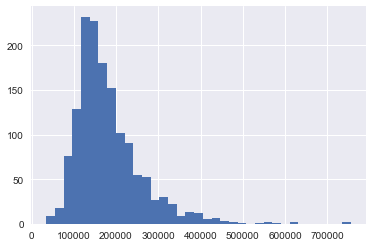

In [526]:
plt.hist (data.SalePrice, bins = 35)

In [443]:
"""Since we see that our data is skewed to right more we need make it more symmetric"""

'Since we see that our data is skewed to right more we need make it more symmetric'

(array([   4.,    1.,    0.,    5.,    7.,    6.,   26.,   45.,   47.,
         114.,  165.,  215.,  172.,  199.,  119.,  109.,   88.,   52.,
          35.,   26.,   12.,    5.,    4.,    2.,    2.]),
 array([ 10.46024211,  10.58321134,  10.70618058,  10.82914982,
         10.95211906,  11.07508829,  11.19805753,  11.32102677,
         11.443996  ,  11.56696524,  11.68993448,  11.81290371,
         11.93587295,  12.05884219,  12.18181142,  12.30478066,
         12.4277499 ,  12.55071913,  12.67368837,  12.79665761,
         12.91962684,  13.04259608,  13.16556532,  13.28853455,
         13.41150379,  13.53447303]),
 <a list of 25 Patch objects>)

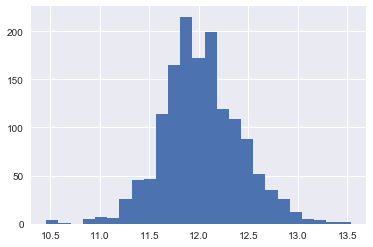

In [528]:
plt.hist (np.log(data.SalePrice), bins = 25)

In [529]:
"""This seems more symmetric"""

'This seems more symmetric'

In [530]:
data.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [531]:
target = np.log(data.SalePrice)
    

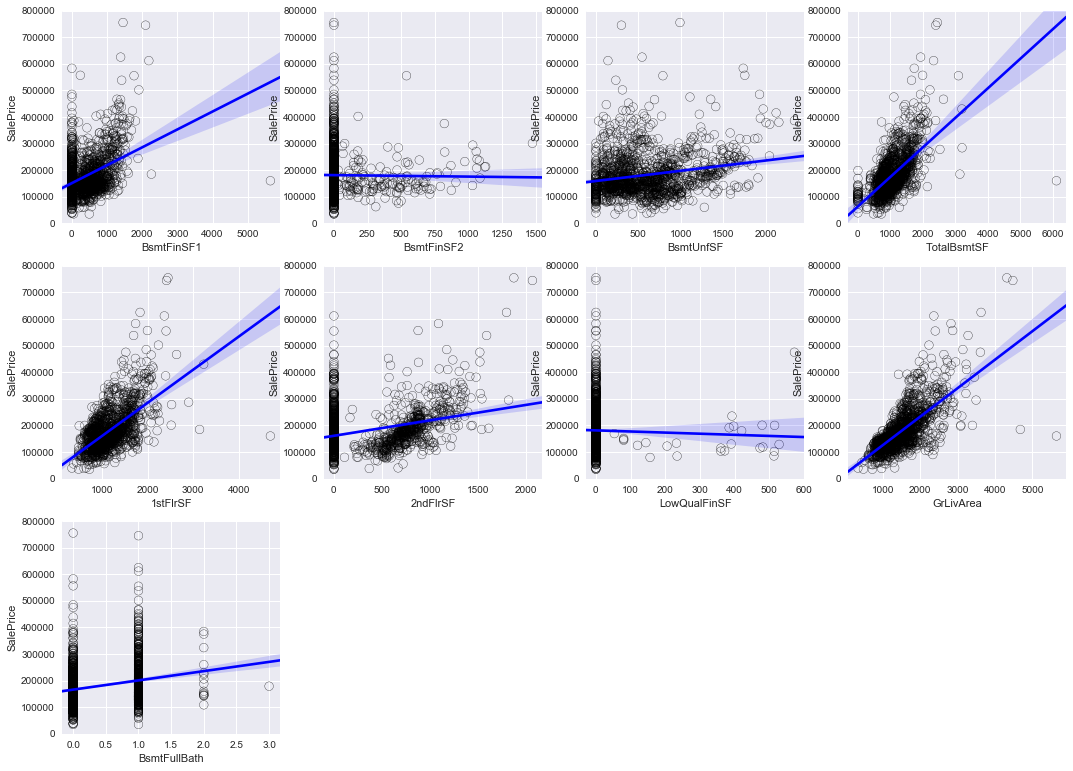

In [532]:
%matplotlib inline
import seaborn as sns
plt.figure(figsize = (18,18))
for i in range(9):
    ii = '44'+str(i+1)
    plt.subplot(ii)
    feature = corr.index.values[i+9]
    plt.scatter(data[feature],data['SalePrice'], facecolors = 'none' , edgecolors = 'k', s = 75)
    sns.regplot(x=feature, y = 'SalePrice', data = data, scatter = False, color = 'Blue')
    ax =plt.gca()
    ax.set_ylim([0,800000])

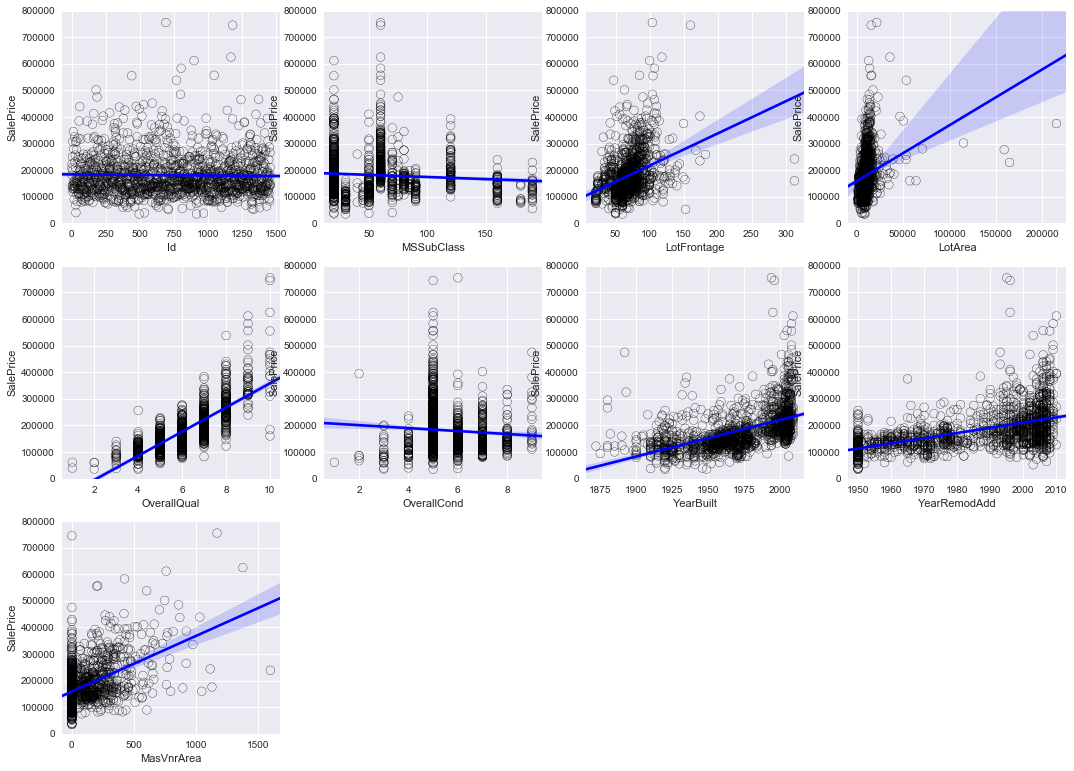

In [344]:
%matplotlib inline
import seaborn as sns
plt.figure(figsize = (18,18))
for i in range(9):
    ii = '44'+str(i+1)
    plt.subplot(ii)
    feature = corr.index.values[i]
    plt.scatter(data[feature],data['SalePrice'], facecolors = 'none' , edgecolors = 'k', s = 75)
    sns.regplot(x=feature, y = 'SalePrice', data = data, scatter = False, color = 'Blue')
  
    ax =plt.gca()
    ax.set_ylim([0,800000])

0
1
2
3
4
5
6
7
8


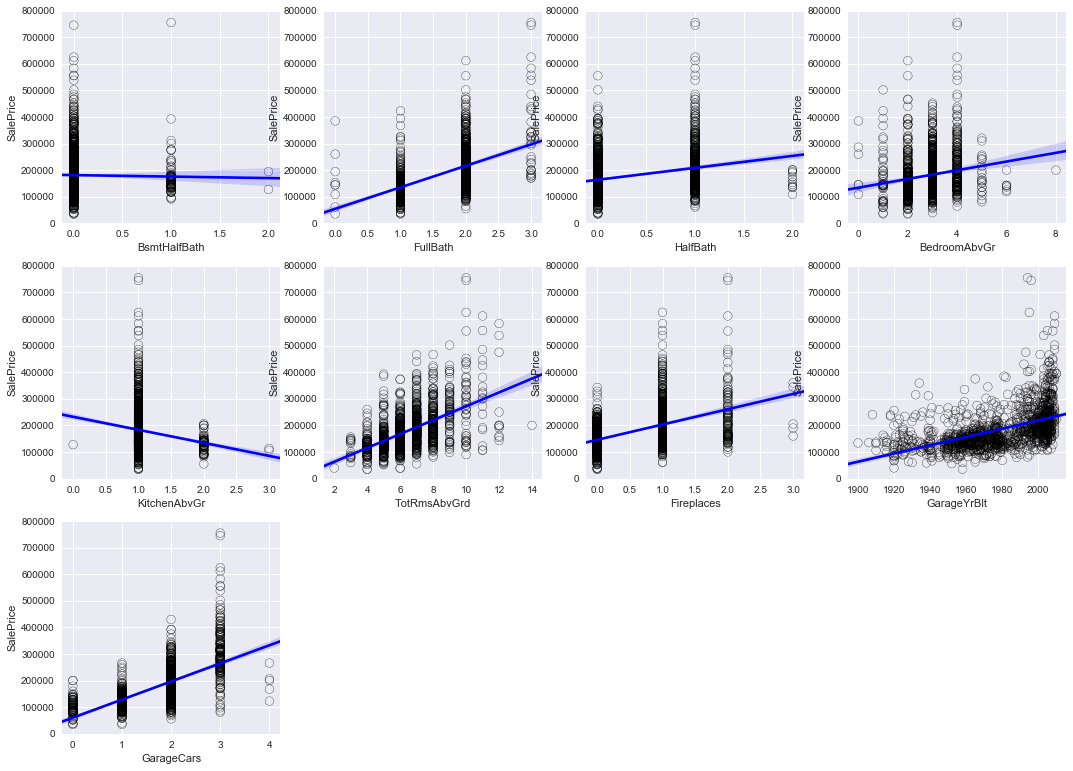

In [345]:
%matplotlib inline
import seaborn as sns
plt.figure(figsize = (18,18))
for i in range(9):
    ii = '44'+str(i+1)
    plt.subplot(ii)
    feature = corr.index.values[i+18]
    plt.scatter(data[feature],data['SalePrice'], facecolors = 'none' , edgecolors = 'k', s = 75)
    sns.regplot(x=feature, y = 'SalePrice', data = data, scatter = False, color = 'Blue')
    print(i)
    ax =plt.gca()
    ax.set_ylim([0,800000])

In [ ]:
%matplotlib inline
import seaborn as sns
plt.figure(figsize = (18,18))
for i in range(9):
    ii = '44'+str(i+1)
    plt.subplot(ii)
    feature = corr.index.values[i+27]
    plt.scatter(data[feature],data['SalePrice'], facecolors = 'none' , edgecolors = 'k', s = 75)
    sns.regplot(x=feature, y = 'SalePrice', data = data, scatter = False, color = 'Blue')
   
    ax =plt.gca()
    ax.set_ylim([0,800000])

In [ ]:
%matplotlib inline
import seaborn as sns
plt.figure(figsize = (18,18))
for i in range(9):
    ii = '44'+str(i+1)
    plt.subplot(ii)
    feature = corr.index.values[i+30]
    plt.scatter(data[feature],data['SalePrice'], facecolors = 'none' , edgecolors = 'k', s = 75)
    sns.regplot(x=feature, y = 'SalePrice', data = data, scatter = False, color = 'Blue')
    
    ax =plt.gca()
    ax.set_ylim([0,800000])

In [2]:
from __future__ import absolute_import

import os

from .core import DMatrix, Booster
from .training import train, cv
from . import rabit               

ModuleNotFoundError: No module named '__main__.core'; '__main__' is not a package